<a href="https://colab.research.google.com/github/Uday0312/Black-Friday__-sales__-Data_-analysis/blob/main/GDP_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

In [11]:
df=pd.read_csv("/content/drive/MyDrive/gdp.csv")

In [12]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [14]:
# DESCRIPTION OF EACH COLUMN

In [15]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [16]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [17]:
df['Year'].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [18]:
df['Year'].min()

1960

In [19]:
df['Year'].max()

2016

In [20]:
#Analysis of Arab World

In [21]:
df_pr = df[df['Country Name'] == 'India']

<Axes: xlabel='YEARS', ylabel='GDP'>

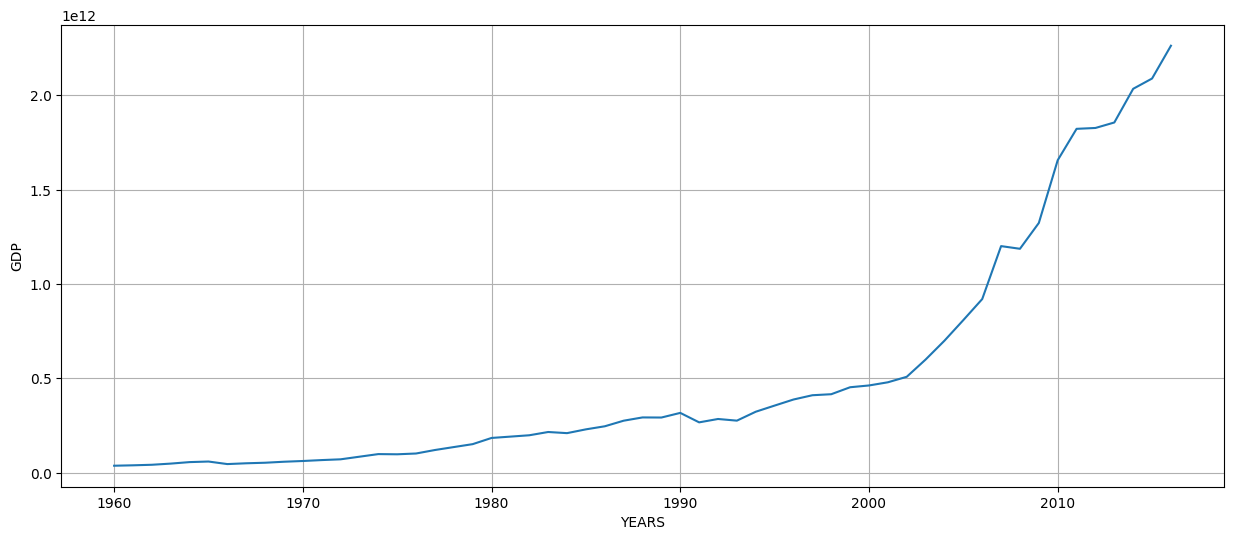

In [22]:
df_pr.plot(kind='line',  x= 'Year',y='Value',figsize=(15,6),grid=True, ylabel='GDP', xlabel= 'YEARS',legend= False)

In [23]:
df_pr

,Country Name,Country Code,Year,Value
6074,India,IND,1960,3.653593e+10
6075,India,IND,1961,3.870910e+10
6076,India,IND,1962,4.159907e+10
6077,India,IND,1963,4.777600e+10
6078,India,IND,1964,5.572687e+10
6079,India,IND,1965,5.876042e+10
6080,India,IND,1966,4.525364e+10
6081,India,IND,1967,4.946617e+10
6082,India,IND,1968,5.237732e+10
6083,India,IND,1969,5.766833e+10


In [24]:
#Finding GDP growth of country

In [25]:
df_pr = df[df['Country Name'] == 'Arab World']

data = df_pr.values

gdp_change = [0]

for i in range(1,len(data)):

    prev = data[i-1][3]
    cur = data[i][3]

    gdp_change.append(round(((cur - prev) / prev)*100,2))

df_pr = df_pr.assign(GDP = gdp_change)

In [26]:
#Finding GDP Growth of Every country

In [27]:
final_data = []

for country_name in df['Country Name'].unique():

    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

df = pd.concat(final_data, axis = 0)


In [28]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [ ]:
#plotting graphs using plotly

In [29]:
df_pr = df[df['Country Name'] == 'World']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis')

fig


In [37]:
pyo.plot(fig, filename= 'World GDP.html')

'World GDP.html'

In [38]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis')

pyo.plot(fig,filename = 'India.html' )

'India.html'

In [33]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis')

fig

# New Section

In [35]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis', range_y= [0,80000000000000])

fig

In [30]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False).head(50)

Country Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        

In [ ]:
#GDP Analysis - Plotting Graphs in Bulk

In [31]:
import os
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

df = pd.read_csv('/content/drive/MyDrive/gdp.csv')

final_data = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):
        prev = data[i-1][3]
        cur = data[i][3]
        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

df = pd.concat(final_data, axis = 0)

df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [ ]:
##GDP OF EACH COUNTRY

In [40]:
os.mkdir('GDP Individual')

for country_name in df['Country Name'].unique():

    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis')
    pyo.plot(fig, filename = 'GDP Individual/' + country_name + '.html', auto_open = False)

FileExistsError: ignored